# Forest Cover Classification #

# Introduction #

<b>Problem</b>
<p>This project classifies forest cover, primary species of trees present, found in the Roosevelt National Forest in Colorado based on several attributes such as shadow coverage, soil type, local topography, and distance to landmarks. Both supervised and unsupervised learning methods are used. Due to the size of the data >500,000, a subset of the data is used to unsupervised learning.</p>

<p>Columns and explanations:</p>
<ul>
<li><b>Elevation</b>: Height above sea level in meters.</li>
<li><b>Aspect</b>: Direction the slope faces, measured in degrees from 0 to 360.</li>
<li><b>Slope</b>: Steepness of the terrain, measured in degrees.</li>
<li><b>Horizontal_Distance_To_Hydrology</b>: Distance to the nearest water source, like a stream or lake, measured in meters.</li>
<li><b>Vertical_Distance_To_Hydrology</b>: Height difference between the point and the nearest water source, measured in meters.</li>
<li><b>Horizontal_Distance_To_Roadways</b>: Distance to the nearest road, measured in meters.</li>
<li><b>Hillshade_9am/Noon/3pm</b>: Amount of shade at the point at different times of the day, ranging from 0 (fully shaded) to 255 (fully lit).</li>
<li><b>Horizontal_Distance_To_Fire_Points</b>: Distance to the nearest known fire location, measured in meters.</li>
<li><b>Wilderness_Area1-4</b>: Binary indicators representing different designated wilderness areas (1 if true, 0 if false).</li>
<li><b>Soil_Type1-40</b>: Binary indicators for specific soil types based on predefined categories</li>
</ul>

<p>Cover Type</p>
<ul>
<li>1. Deciduous Forests</li>
<li>2. Coniferous Forests (Evergreens)</li>
<li>3. Mixed Forests: A combination of deciduous and coniferous trees.</li>
<li>4. Tropical Rainforests</li>
<li>5. Boreal Forests (Taiga)</li>
<li>6. Temperate Forests</li>
<li>7. Mangrove Forests</li>
</ul>

<b>Data Source</b>
<p>This dataset is part of the UCI Machine Learning Repository. The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University.</p>
<p>Data be downloaded at: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset</p>

<b>Outline</b>
1. Importing libraries and data
2. Exploratory Data Analysis (EDA):
   - Inspect data distribution and values
   - Visualize data distribution and values
   - Clipping outliers
   - Finding correlations (apply PCA to address the problem)
   - Data transformation: Using <b>StandardScaler</b> to scale numerical data
   - Data transformation: Run <b>PCA</b> (principle component analysis) on the data
3. Supervised Learning Models: <b>Random Forest<b> and <b>Logistics Regression</b>
4. Unsupervised Learning Models: <b>KMeans</b>, <b>DBSCAN (Density Based Clustering)</b> and <b>Hierarchical Clustering</b>
5. Comparison based on accuracy score, silhouette score, ARI score, and run time
6. Conclusion

## Importing Libraries and Loading Data ##

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, silhouette_score, adjusted_rand_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import time
from scipy.stats import mode
from sklearn.manifold import TSNE

In [132]:
df_all = pd.read_csv('covtype.csv')

pd.set_option('display.max_column', None)
df_all.info()
df_all.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


[5 2 1 7 3 6 4]


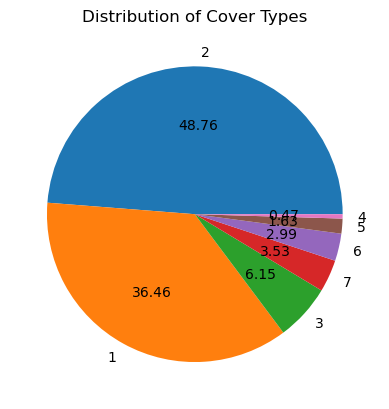

In [133]:
unique_cover_types = df_all['Cover_Type'].unique()
print(unique_cover_types)

cover_type_dist = df_all['Cover_Type'].value_counts()

plt.pie(cover_type_dist, labels=cover_type_dist.index, autopct='%.2f')
plt.title('Distribution of Cover Types')
plt.show()

In [134]:
# only 0.47 of the data is labeled 4, checking how many data there are
df_all.loc[df_all['Cover_Type'] == 4].count()

Elevation                             2747
Aspect                                2747
Slope                                 2747
Horizontal_Distance_To_Hydrology      2747
Vertical_Distance_To_Hydrology        2747
Horizontal_Distance_To_Roadways       2747
Hillshade_9am                         2747
Hillshade_Noon                        2747
Hillshade_3pm                         2747
Horizontal_Distance_To_Fire_Points    2747
Wilderness_Area1                      2747
Wilderness_Area2                      2747
Wilderness_Area3                      2747
Wilderness_Area4                      2747
Soil_Type1                            2747
Soil_Type2                            2747
Soil_Type3                            2747
Soil_Type4                            2747
Soil_Type5                            2747
Soil_Type6                            2747
Soil_Type7                            2747
Soil_Type8                            2747
Soil_Type9                            2747
Soil_Type10

In [135]:
df_all.isnull().values.any() #checking for null

np.False_

In [136]:
# separating numerical from boolean columns
int_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
               'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
               'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
bool_columns = [col for col in df_all.columns if col.startswith('Soil_Type') or col.startswith('Wilderness_Area')]

There are many columns with categorical information on soil types and wilderness are, here's look at the distribution of both

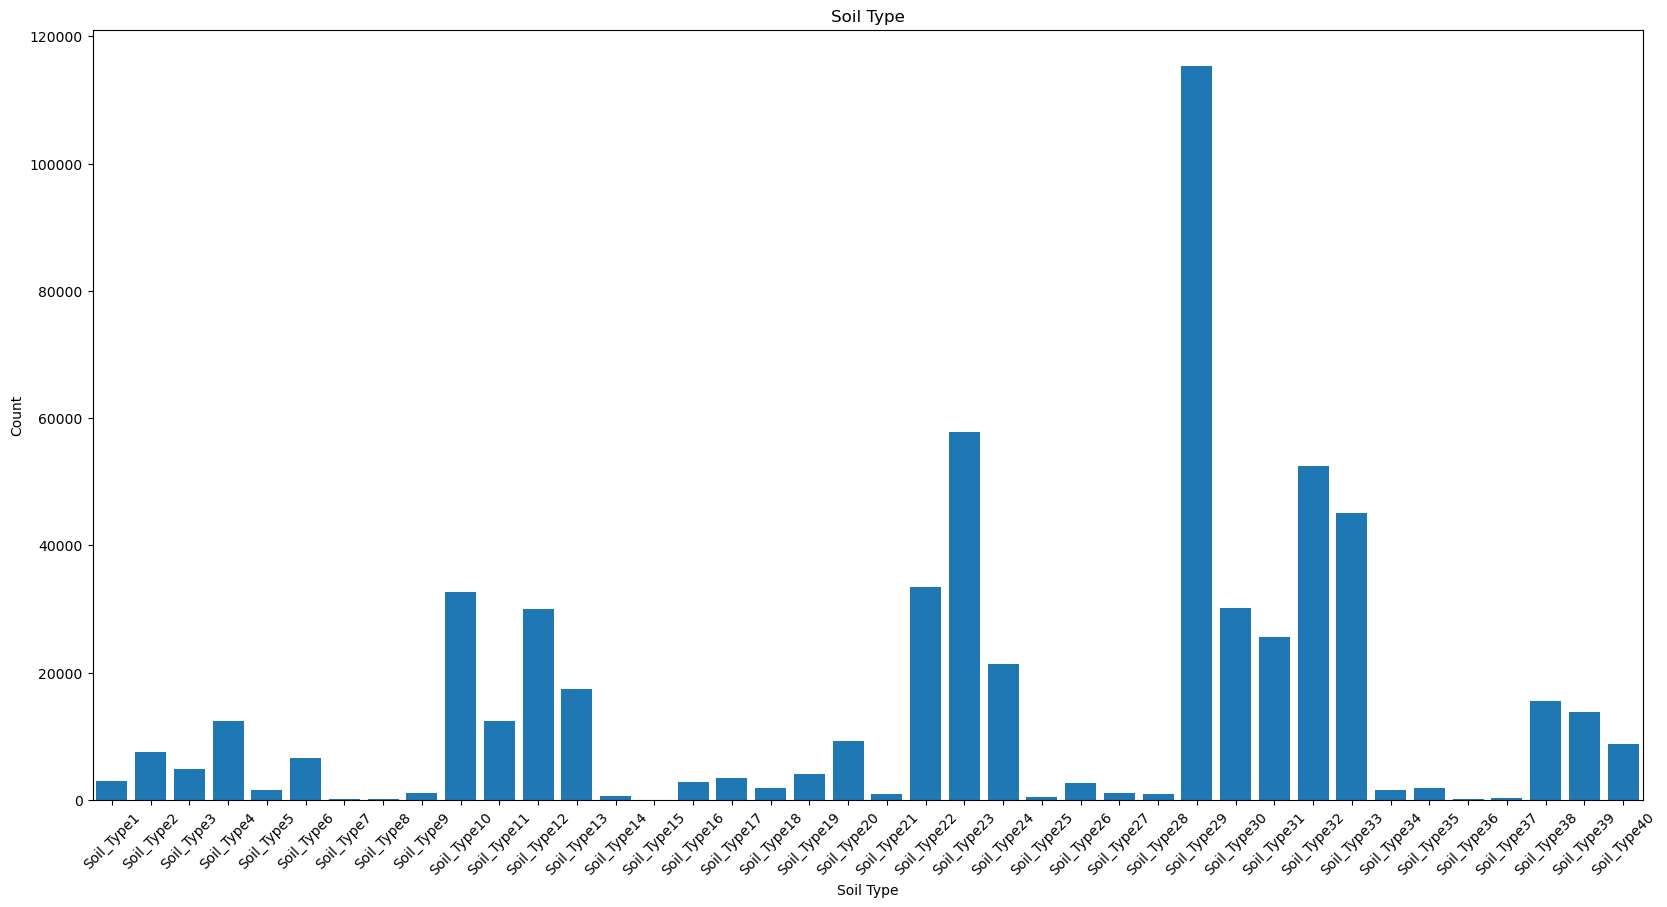

In [137]:
soil_columns = [col for col in df_all.columns if 'Soil_Type' in col]
soil_type_total = df_all[soil_columns].sum()

plt.figure(figsize=(20,10))
plt.bar(soil_type_total.index, soil_type_total.values)
soil_type_total.plot(kind='bar')
plt.title('Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

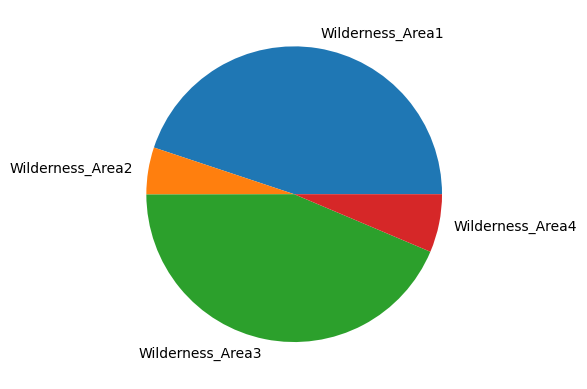

In [138]:
wilder_columns = [col for col in df_all.columns if 'Wilderness_Area' in col]
wilder_type_total = df_all[wilder_columns].sum()

plt.pie(wilder_type_total, labels=wilder_type_total.index)
plt.show()

reasonable soil distribution and wilderness area distribution

<b> Next we will look at the Elevation and Slope to make sure they are not negative </b>

In [139]:
def check_outliers(col):
    
    z_scores = zscore(df_all[col])
    outliers = (z_scores > 3) | (z_scores < -3)

    print('\n%s outliers outside 3 SD: %d' % (col, outliers.loc[outliers == True].count()))

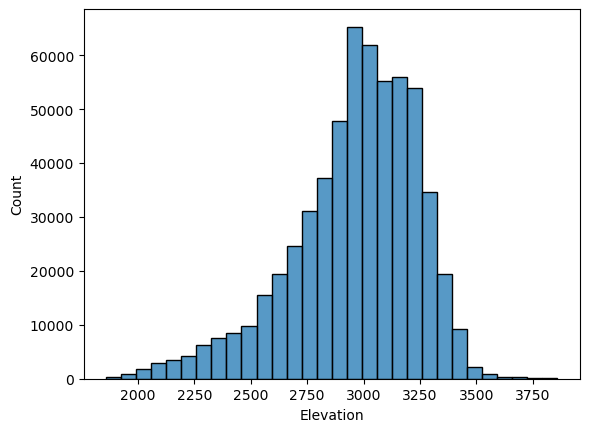

How many negative elevation : 0

Elevation outliers outside 3 SD: 5832


In [140]:
sns.histplot(data=df_all, x='Elevation', bins=30)
plt.show()

#Elevation shouldn't be negative
neg_elevation = df_all.loc[df_all['Elevation'] < 0]
print('How many negative elevation : %d' % neg_elevation.shape[0])

check_outliers('Elevation')

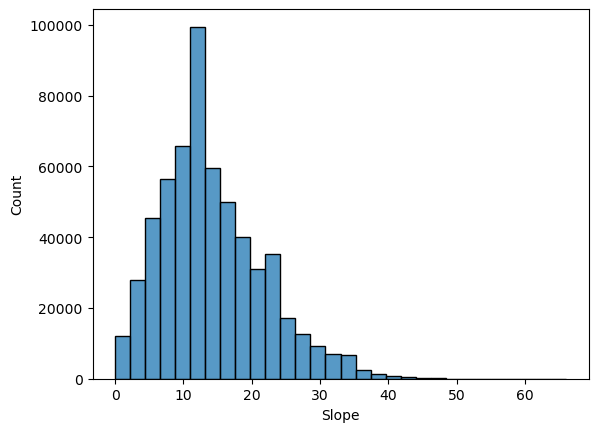


How many negative Slope : 0

Slope outliers outside 3 SD: 4074


In [141]:
sns.histplot(data=df_all, x='Slope', bins=30)
plt.show()

#slope shouldn't be negative
neg_slope = df_all.loc[df_all['Slope'] < 0]
print('\nHow many negative Slope : %d' % neg_slope.shape[0])

check_outliers('Slope')

<b>Checking other columns</b>

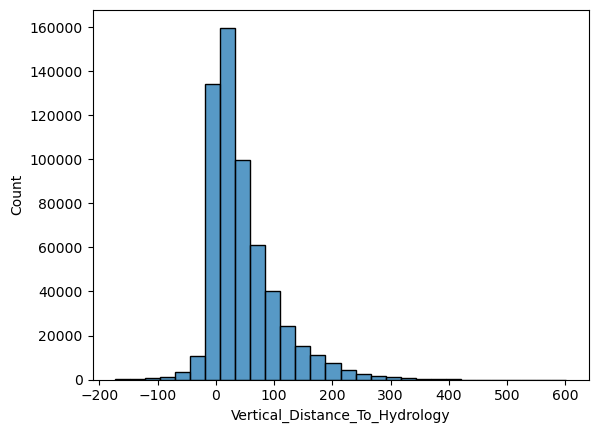


How many negative Vertical_Distance_To_Hydrology : 55143

Vertical_Distance_To_Hydrology outliers outside 3 SD: 10059


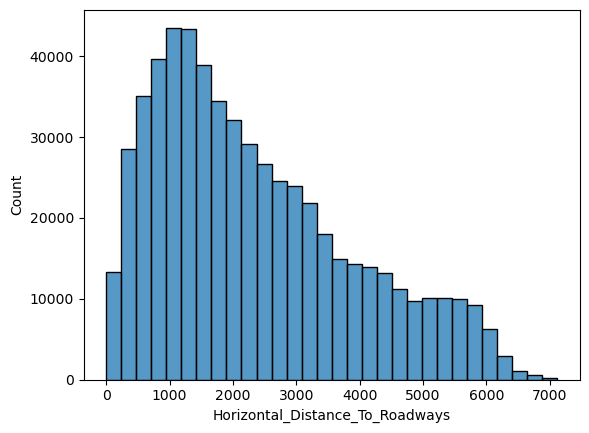


How many negative Horizontal_Distance_To_Roadways : 0

Horizontal_Distance_To_Roadways outliers outside 3 SD: 33


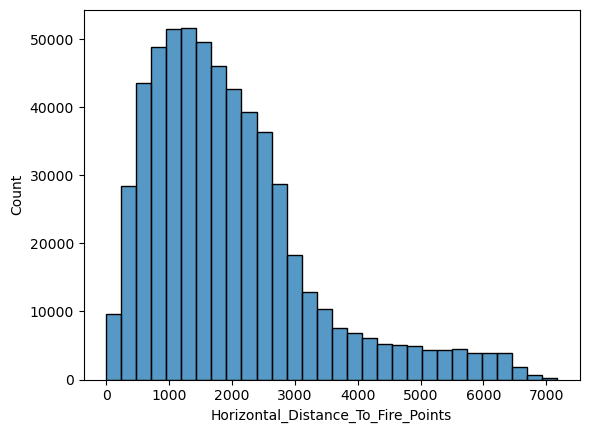


How many negative Horizontal_Distance_To_Fire_Points : 0

Horizontal_Distance_To_Fire_Points outliers outside 3 SD: 10853


In [142]:
for col in ['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']:
    sns.histplot(data=df_all, x=col, bins=30)
    plt.show()
    
    #checking negatives
    neg = df_all.loc[df_all[col] < 0]
    print('\nHow many negative %s : %d' % (col, neg.shape[0]))

    check_outliers(col)

<b>Observations</b>
Data distribution looks good.

In [143]:
#  clipping outliers

'''
lower_bound = df_all.quantile(0.01)
upper_bound = df_all.quantile(0.99)

capped_rows = (df_all < lower_bound) | (df_all > upper_bound)
rows_affected = capped_rows.any(axis=1)
print('Number of rows affected due to outliers: %d' % rows_affected.sum())

df_clean = df_all.clip(lower=lower_bound, upper=upper_bound, axis=1)
'''

df_clean = df_all.copy()

### Correlation ###
Hillshade, aspect and slope are usually correlated, here's to confirm

                Hillshade_9am  Hillshade_Noon  Hillshade_3pm    Aspect  \
Hillshade_9am        1.000000        0.010037      -0.780296 -0.579273   
Hillshade_Noon       0.010037        1.000000       0.594274  0.336103   
Hillshade_3pm       -0.780296        0.594274       1.000000  0.646944   
Aspect              -0.579273        0.336103       0.646944  1.000000   
Slope               -0.327199       -0.526911      -0.175854  0.078728   
Cover_Type          -0.035415       -0.096426      -0.048290  0.017080   

                   Slope  Cover_Type  
Hillshade_9am  -0.327199   -0.035415  
Hillshade_Noon -0.526911   -0.096426  
Hillshade_3pm  -0.175854   -0.048290  
Aspect          0.078728    0.017080  
Slope           1.000000    0.148285  
Cover_Type      0.148285    1.000000  


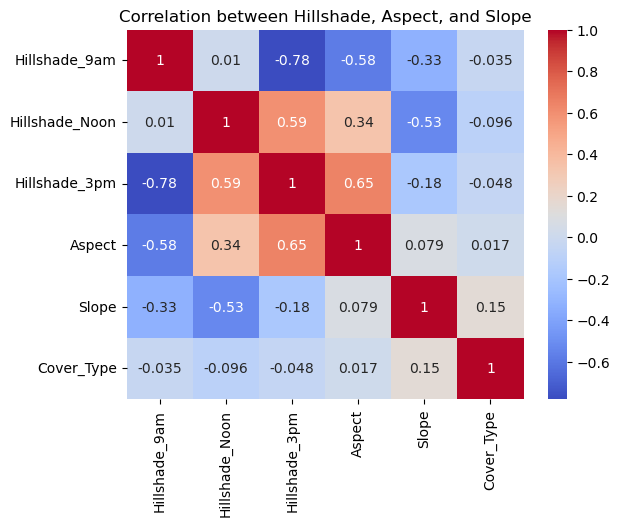

In [144]:
X_correlation = df_clean[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Aspect', 'Slope', 'Cover_Type']].corr()

print(X_correlation)

sns.heatmap(X_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Hillshade, Aspect, and Slope')
plt.show()

<b>Observations</b>
- Hillshade_9am and Hillshade_3pm are strongly correlated with a value of ~-0.80
- Hillshade_3pm and Aspect are moderately correlated with a value of ~0.65
- Slope doesn't have a high correlation with other features
- Will apply <b>PCA</b> to reduce dimentionality

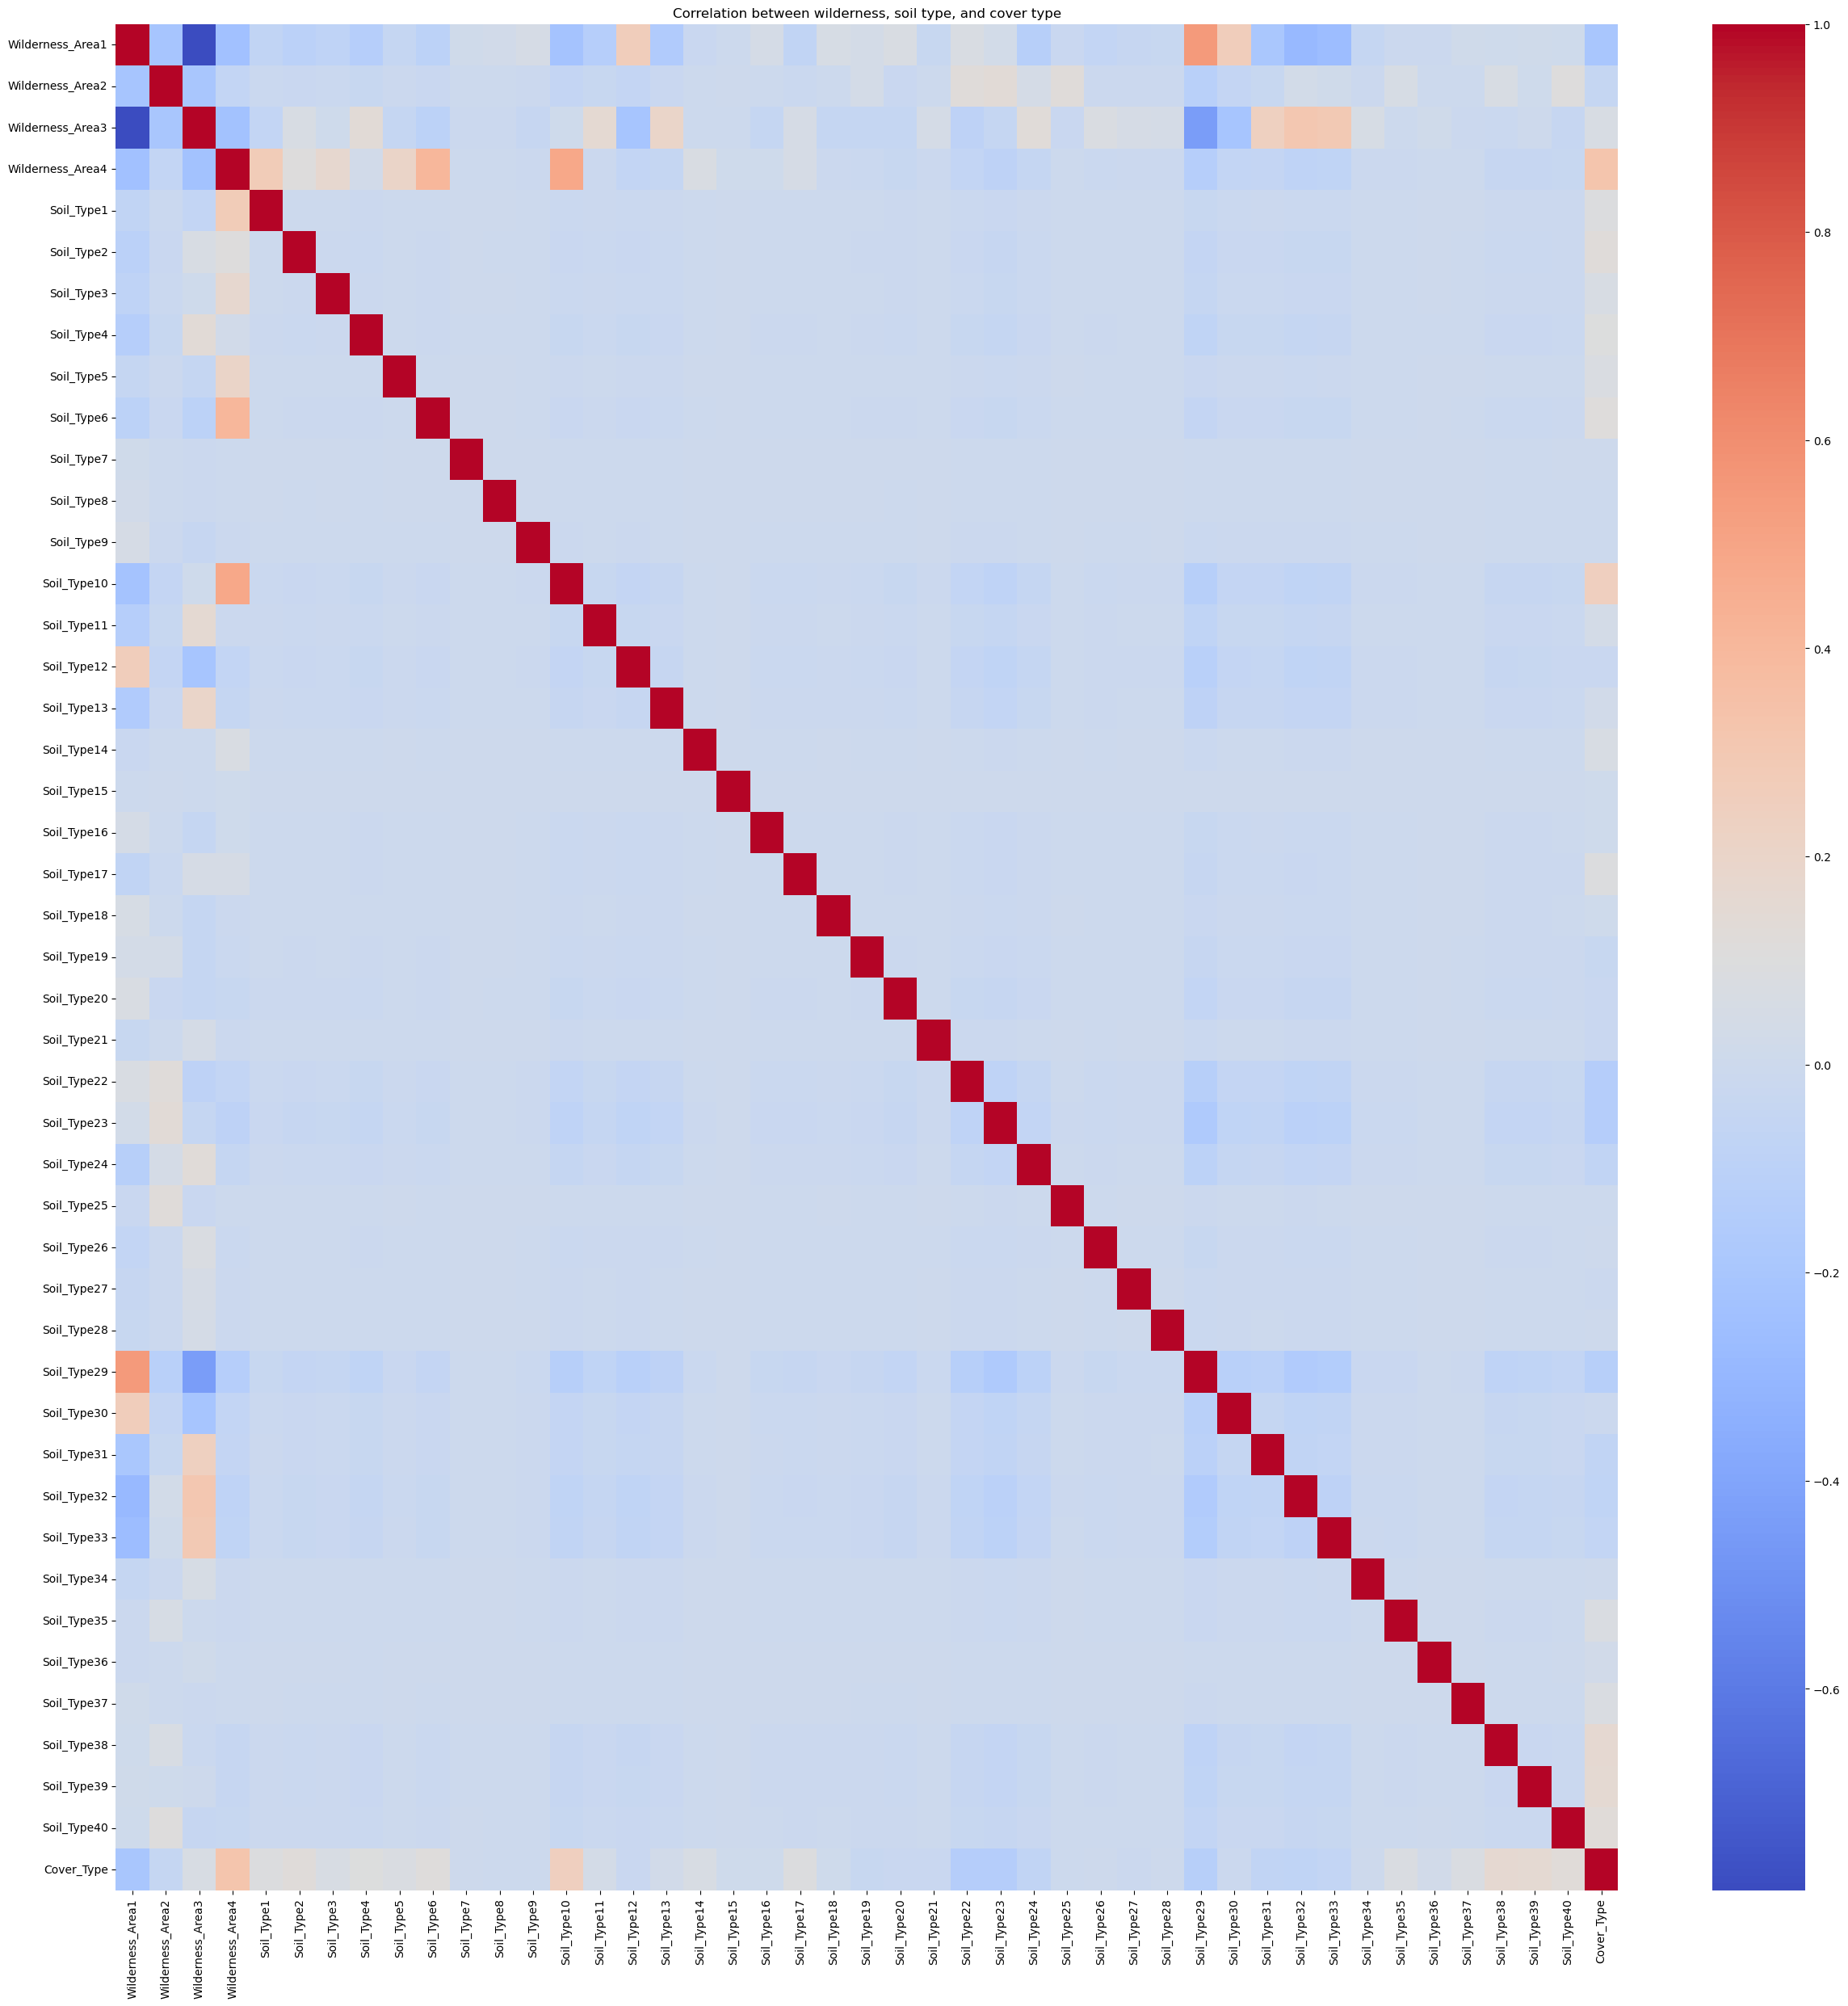

In [145]:
X_correlation = df_clean[bool_columns + ['Cover_Type']].corr()

plt.figure(figsize=(30,30))
sns.heatmap(X_correlation, cmap='coolwarm')
plt.title('Correlation between wilderness, soil type, and cover type')
plt.show()

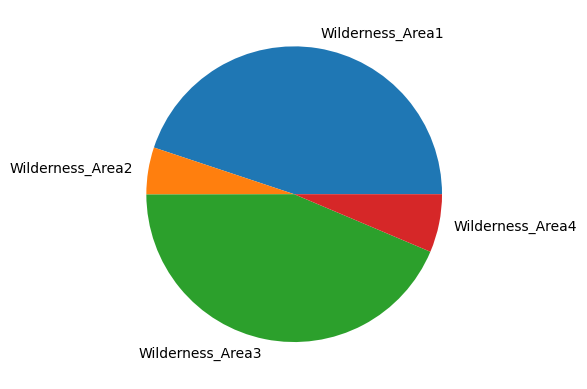

Correlation between Wilderness Area 1 and Wilderness Area 3: -0.7935926588275811


In [146]:
# Strong correlation between Wilderness Area 1 and Wilderness Area 3
# will run PCA

wilder_columns = [col for col in df_all.columns if 'Wilderness_Area' in col]
wilder_type_total = df_all[wilder_columns].sum()

plt.pie(wilder_type_total, labels=wilder_type_total.index)
plt.show()

print(f'Correlation between Wilderness Area 1 and Wilderness Area 3: {X_correlation['Wilderness_Area1']['Wilderness_Area3']}')

<b>Observations:</b> Wilderness area 1 and area 3 are a majority of the data and they are strongly correlated, this will make unsupervised learning difficult

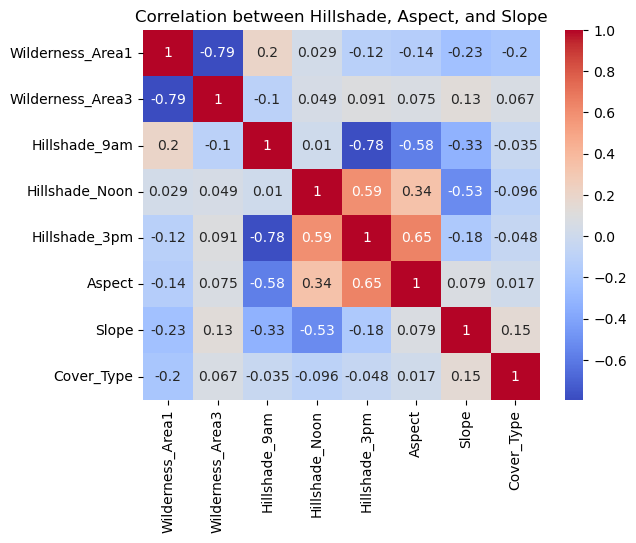

In [147]:
# check to see wilderness Area 1 and Wilderndess area 3's correlation with numerical data

X_correlation = df_clean[['Wilderness_Area1', 'Wilderness_Area3', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Aspect', 'Slope', 'Cover_Type']].corr()

sns.heatmap(X_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Hillshade, Aspect, and Slope')
plt.show()

<b>Observations<b>: 
- two strong correlations
- Wilderness Area 1 & Wilderness Area 3
- Hillshade 9am and Hillshade 3pm

- one moderate correlations: 
- Hillshade 3pm and Aspect
- Hillshade 3pm and Hillshade Noon

In [148]:
'''
Hillshade 3pm is strongly correlated to Hillshade 9am and moderately correlated to aspect and Hillshade noon, we will drop Hillshade 3pm
'''
df_clean = df_clean.drop(columns='Hillshade_3pm')
int_columns.remove('Hillshade_3pm')
print(int_columns)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']


# Supervised Learning #

## Data Split (for supervised) and Scaling ##

In [149]:
# data and scaler
X = df_clean.drop(columns=['Cover_Type'])
y = df_clean['Cover_Type']
scaler = StandardScaler()

In [150]:
# data manipulation for supervised learning
# split the dataset into training and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data using StandardScaler
X_train_scaled = X_train.copy()
X_train_scaled[int_columns] = scaler.fit_transform(X_train_scaled[int_columns])

X_test_scaled = X_test.copy()
X_test_scaled[int_columns] = scaler.transform(X_test_scaled[int_columns])

## PCA ##

In [151]:
# find how many components to use top preserve 95% variance

pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
print('number of components: %d' % pca.n_components_)

number of components: 10


In [152]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### Random Forest ###

In [153]:
# Random Forest

start = time.time()

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

end = time.time()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

print(f'Run time: {end-start} seconds')

Accuracy score: 0.9202086004664252
Run time: 148.46342873573303 seconds


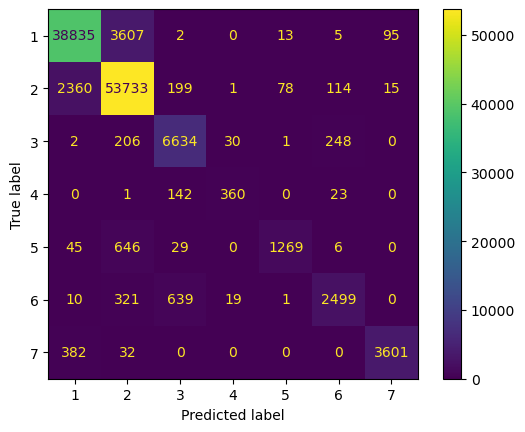

In [155]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()

### Logistic Regression ###

Accuracy score: 0.702675490305758
Run time: 5.320346832275391 seconds


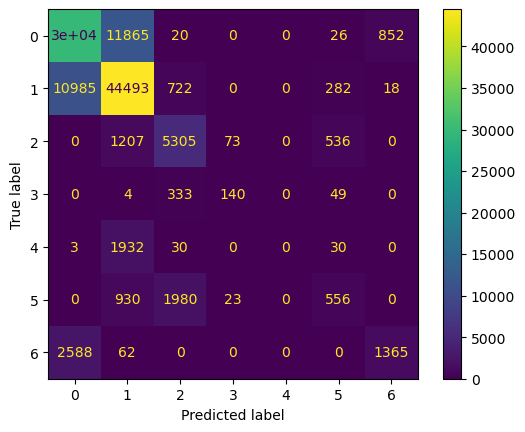

In [156]:
# Logistic Regression

start = time.time()

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

end = time.time()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

print(f'Run time: {end-start} seconds')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Unsupervised Learning ##

### Scaling and PCA ###

Due to the unbalanced nature of the data, we will use all data from label 3-7 and only 10% of 1 and 2. 90% of the rest first let's see how many data are for each label.

In [157]:
print(y.value_counts())

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


Cover_Type
3    32105
2    28344
1    21170
7    18495
6    15668
5     8544
4     2747
Name: count, dtype: int64


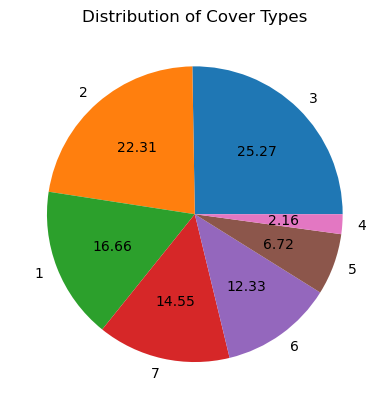

In [179]:
minority_class = df_clean[df_clean['Cover_Type'].isin([3, 7, 6, 5])]
majority_class = df_clean[df_clean['Cover_Type'].isin([2,1])]
cover_type4 = df_clean[df_clean['Cover_Type'] == 4]

# 10% majority, 90% minority
majority_sample = majority_class.sample(frac=0.10, random_state=42)
minority_sample = minority_class.sample(frac=0.90, random_state=42)
balanced_data = pd.concat([cover_type4, minority_sample, majority_sample])

#shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

#check new distribution
print(balanced_data['Cover_Type'].value_counts())

plt.pie(balanced_data['Cover_Type'].value_counts(), labels=balanced_data['Cover_Type'].value_counts().index, autopct='%.2f')
plt.title('Distribution of Cover Types')
plt.show()

In [180]:
'''
We will also try consolidate soil type and wilderness areas to reduce dimensionality
'''
soil_cols = []
for i in range(1, 41):
    soil_cols.append('Soil_Type' + str(i))
    
balanced_data['soil_type'] = np.argmax(balanced_data[soil_cols].values, axis=1)
balanced_data = balanced_data.drop(soil_cols, axis=1)

wilder_cols = []
for i in range(1, 5):
    wilder_cols.append('Wilderness_Area' + str(i))

balanced_data['wilderness_area'] = np.argmax(balanced_data[wilder_cols].values, axis=1)
balanced_data = balanced_data.drop(wilder_cols, axis=1)

print(balanced_data)

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2680     101     12                               450   
1            1998       4     18                               162   
2            3121      36      7                               234   
3            3228     315      5                               408   
4            3250      82     12                                 0   
...           ...     ...    ...                               ...   
127068       3260     117      3                               785   
127069       3173     103     23                               162   
127070       2216     132     19                                 0   
127071       2297     323     36                               256   
127072       2864     272     23                               150   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   12                             1015   
1        

In [181]:
X = balanced_data.drop(columns=['Cover_Type'])
y = balanced_data['Cover_Type']

X_unsuper = X.copy()
X_unsuper[int_columns] = scaler.fit_transform(X_unsuper[int_columns])
y_unsuper = y.copy()

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_unsuper)
print('number of components: %d' % pca.n_components_)
print(X_pca.shape[0])

number of components: 2
127073


In [182]:
# checking which components are important
for i, component in enumerate(pca.components_):
    print(f'Principle Component {i+1}: {component}')

print(X_unsuper.columns)

Principle Component 1: [ 0.06595611 -0.00377029 -0.02086441  0.02035159  0.00238345  0.03763245
  0.0090246   0.00619521  0.0284485   0.99508997 -0.04723338]
Principle Component 2: [-0.15905204  0.22356375  0.45329622  0.12369199  0.31961794 -0.26816036
 -0.39721744 -0.3270241  -0.31970005  0.06145511  0.39895815]
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points',
       'soil_type', 'wilderness_area'],
      dtype='object')


In [183]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unsuper)

### K-Mean Clustering ###

In [184]:
# helper function
# matching labels by majority
# return an array of aligned labels
def mapped_labels(predicted_labels, actual_labels):
    mapping = {}
    mapped_to = {}
    #print('\nMapping:')
    for label in np.unique(predicted_labels):
        indices = np.where(predicted_labels == label)[0]
        true_labels = actual_labels[indices]
        most_label = mode(true_labels).mode;
        mapping[label] = most_label
        if most_label in mapped_to.keys():
            mapped_to[most_label].append(label)
        else:
            mapped_to[most_label] = [label]

    # for printing purposes
    '''
    for k in mapped_to.keys():
        print(f'These Predicted labels are being mapped to Real label {k}:')
        for i in mapped_to[k]:
            print(i, end=',')
        print('\n')
    '''
        
    return np.array([mapping[label] for label in predicted_labels])

In [185]:
# K-mean Clustering

start = time.time()

kmeans = KMeans(n_clusters=7, random_state=42, init='k-means++')
clusters = kmeans.fit_predict(X_pca)

end = time.time()

silhouette = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {silhouette}')

print(f'Run time: {end-start} seconds')

Silhouette Score: 0.5759082398123608
Run time: 0.02775096893310547 seconds


#### Experimenting with different cluster numbers ###


KMeans with 2 Clusters:
Accuracy: 0.41761034995632434
Silhouette Score: 0.711825450132933
Adjusted Rand Index (ARI): 0.25874019418638633

KMeans with 3 Clusters:
Accuracy: 0.4134946054630016
Silhouette Score: 0.6159829003614097
Adjusted Rand Index (ARI): 0.25348509854140394

KMeans with 4 Clusters:
Accuracy: 0.4489545379427573
Silhouette Score: 0.6012106496744078
Adjusted Rand Index (ARI): 0.2692249811467657

KMeans with 5 Clusters:
Accuracy: 0.5571600576046839
Silhouette Score: 0.6469124263154559
Adjusted Rand Index (ARI): 0.33033001459115724

KMeans with 6 Clusters:
Accuracy: 0.5877566438189072
Silhouette Score: 0.6151299006519377
Adjusted Rand Index (ARI): 0.3719613320577165

KMeans with 7 Clusters:
Accuracy: 0.5877487743265682
Silhouette Score: 0.5759082398123608
Adjusted Rand Index (ARI): 0.3719246682874959


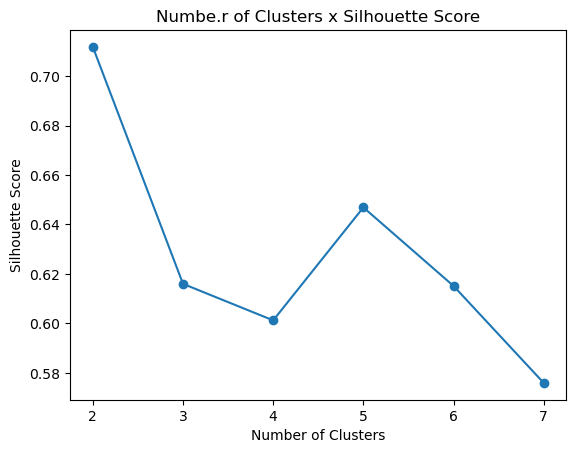

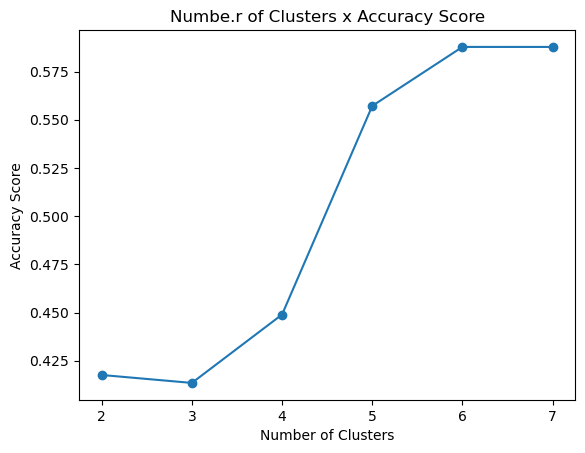

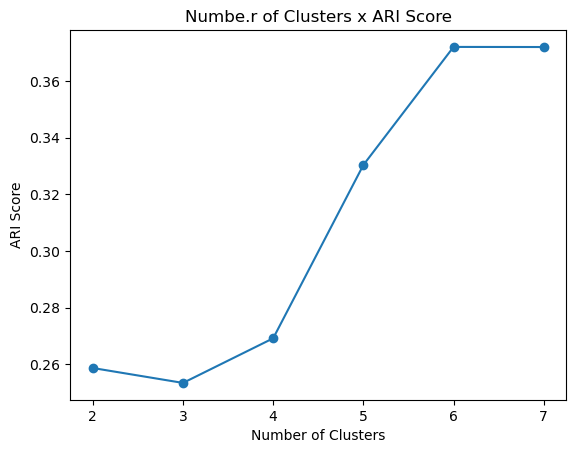

In [186]:
# we will try a few clusters

s_scores = []
accuracy_scores = []
ari_scores = []

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++')
    clusters = kmeans.fit_predict(X_pca)
    
    aligned_labels = mapped_labels(clusters, y_unsuper.values)
    
    print(f'\nKMeans with {i} Clusters:')
    
    accuracy = accuracy_score(y_unsuper.values, aligned_labels)
    accuracy_scores.append(accuracy)
    print(f'Accuracy: {accuracy}')
    
    silhouette = silhouette_score(X_pca, clusters)
    s_scores.append(silhouette)
    print(f'Silhouette Score: {silhouette}')
    
    
    ari = adjusted_rand_score(y_unsuper.values, aligned_labels)
    ari_scores.append(ari)
    print(f'Adjusted Rand Index (ARI): {ari}')

plt.plot(range(2, 8), s_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Numbe.r of Clusters x Silhouette Score')
plt.show()

plt.plot(range(2, 8), accuracy_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy Score')
plt.title('Numbe.r of Clusters x Accuracy Score')
plt.show()

plt.plot(range(2, 8), ari_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('ARI Score')
plt.title('Numbe.r of Clusters x ARI Score')
plt.show()

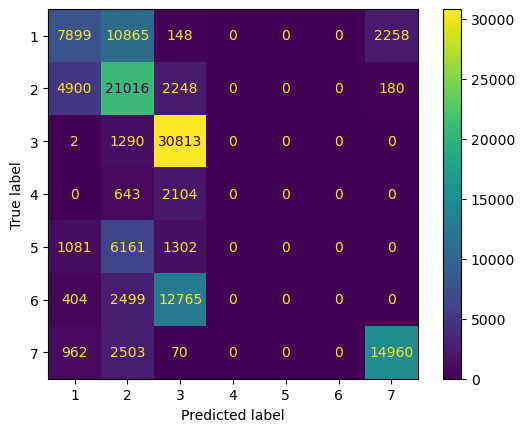

In [187]:
'''
at n_clusters = 6, we see a higher accuracy and silhouette scores

confusion_matrix for 6 clusters

'''
kmeans = KMeans(n_clusters=6, random_state=42, init='k-means++')
clusters = kmeans.fit_predict(X_pca)    
aligned_labels = mapped_labels(clusters, y_unsuper.values)
cm = confusion_matrix(y_unsuper, aligned_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_unsuper))
disp.plot()

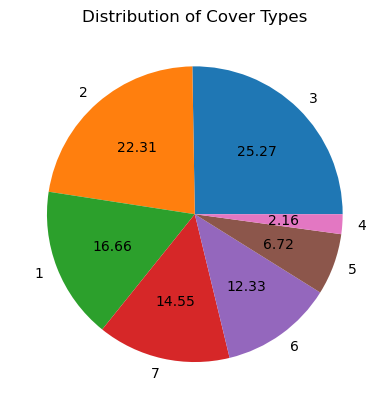

In [188]:
plt.pie(balanced_data['Cover_Type'].value_counts(), labels=balanced_data['Cover_Type'].value_counts().index, autopct='%.2f')
plt.title('Distribution of Cover Types')
plt.show()

### Density-Based Clustering (DBSCAN) ###

DBSCAN can detect dense regions and noises automatically and works for clusters of odd shapes. It might be a better choice than KMeans

Accuracy: 0.6001510942529098
Silhouette Score: 0.31045327025272446
Adjusted Rand Index (ARI): 0.3971911343501467


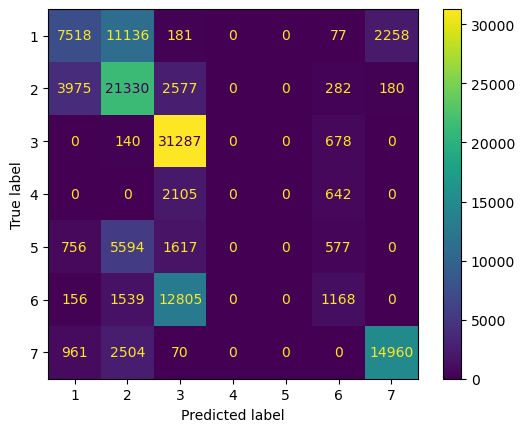

In [189]:
dbscan = DBSCAN(eps=0.5, min_samples=10) 
clusters = dbscan.fit_predict(X_pca)

aligned_labels = mapped_labels(clusters, y_unsuper.values)
cm = confusion_matrix(y_unsuper, aligned_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_unsuper))
disp.plot()

accuracy = accuracy_score(y_unsuper.values, aligned_labels)
print(f'Accuracy: {accuracy}')

silhouette = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {silhouette}')

ari = adjusted_rand_score(y_unsuper.values, aligned_labels)
print(f'Adjusted Rand Index (ARI): {ari}')

In [190]:
# Trying a few different parameters

for e in [0.2, 0.5, 1]:
    for i in [20, 50, 100]:
    
        dbscan = DBSCAN(eps=e, min_samples=i)
        clusters = dbscan.fit_predict(X_pca)
        
        aligned_labels = mapped_labels(clusters, y_unsuper.values)
        #cm = confusion_matrix(y_unsuper, aligned_labels)
        #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_cover_types)
        #disp.plot()
    
        print(f'\nDistance: {e} Mininum Samples: {i}')
        
        accuracy = accuracy_score(y_unsuper.values, aligned_labels)
        print(f'Accuracy: {accuracy}')
        
        silhouette = silhouette_score(X_pca, clusters)
        print(f'Silhouette Score: {silhouette}')
        
        ari = adjusted_rand_score(y_unsuper.values, aligned_labels)
        print(f'Adjusted Rand Index (ARI): {ari}')


Distance: 0.2 Mininum Samples: 20
Accuracy: 0.5994192314653781
Silhouette Score: 0.29521324027363305
Adjusted Rand Index (ARI): 0.3950529016059955

Distance: 0.2 Mininum Samples: 50
Accuracy: 0.5946109716462191
Silhouette Score: 0.29649202344555503
Adjusted Rand Index (ARI): 0.3855978723874085

Distance: 0.2 Mininum Samples: 100
Accuracy: 0.5856869673337373
Silhouette Score: 0.2891951114436247
Adjusted Rand Index (ARI): 0.3676036507478496

Distance: 0.5 Mininum Samples: 20
Accuracy: 0.6001038772988755
Silhouette Score: 0.30915242031468854
Adjusted Rand Index (ARI): 0.3970704413293689

Distance: 0.5 Mininum Samples: 50
Accuracy: 0.599718272174262
Silhouette Score: 0.31101375142768983
Adjusted Rand Index (ARI): 0.396248200878657

Distance: 0.5 Mininum Samples: 100
Accuracy: 0.5980342008137055
Silhouette Score: 0.3037328930660075
Adjusted Rand Index (ARI): 0.39280144098246983

Distance: 1 Mininum Samples: 20
Accuracy: 0.4179723466039206
Silhouette Score: 0.40117308068365004
Adjusted Rand

The best case is setting epsilon (min distance) to 0.5 and min samples to 10

### Hierarchical Clustering ###

25414
Run time: 5.732473134994507 seconds


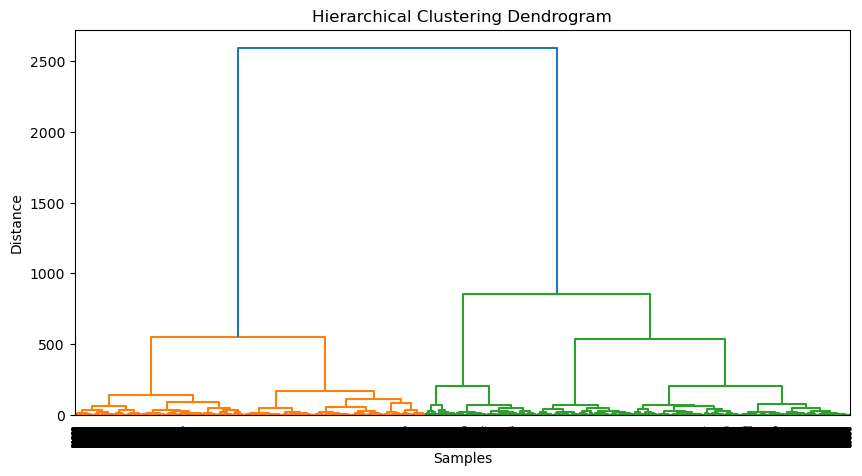

In [191]:
# Hierarchical Clustering

'''
too much data causes memory to run out
will reduce data to 20%, redo scaler and PCA
'''

sample_size = int(0.2 * balanced_data.shape[0])
sample_indices = np.random.choice(balanced_data.shape[0], sample_size, replace=False)
balanced_data = balanced_data.iloc[sample_indices]

X = balanced_data.drop(columns=['Cover_Type'])
y = balanced_data['Cover_Type']

X_unsuper = X.copy()
X_unsuper[int_columns] = scaler.fit_transform(X_unsuper[int_columns])
y_unsuper = y.copy()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unsuper)
print(X_pca.shape[0])

''''''''''''''''''

start = time.time()

X_linkage = linkage(X_pca, method='ward')

end = time.time()

print(f'Run time: {end-start} seconds')

# dendrogram
plt.figure(figsize=(10,5))
dendrogram(X_linkage)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Accuracy: 0.593491776186354
Silhouette Score: 0.4124043139174327
Adjusted Rand Index (ARI): 0.36319539635115644


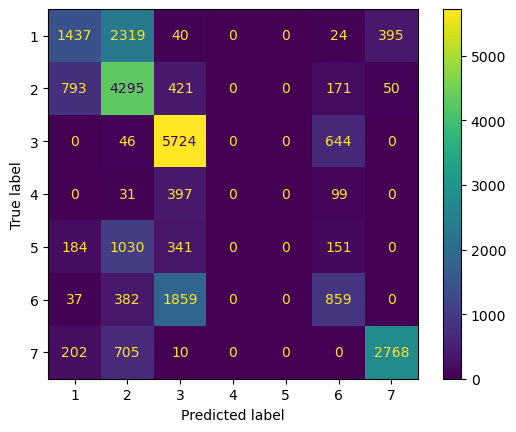

In [192]:
clusters = fcluster(X_linkage, t=50, criterion='distance')
aligned_labels = mapped_labels(clusters, y_unsuper.values)
cm = confusion_matrix(y_unsuper.values, aligned_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_unsuper))
disp.plot()

accuracy = accuracy_score(y_unsuper.values, aligned_labels)
print(f'Accuracy: {accuracy}')

silhouette = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {silhouette}')

ari = adjusted_rand_score(y_unsuper.values, aligned_labels)
print(f'Adjusted Rand Index (ARI): {ari}')

#### Experimenting with different t values ####

In [193]:
# trying a few values for t
for t in [30, 50, 100, 200]:
    clusters = fcluster(X_linkage, t=t, criterion='distance')
    aligned_labels = mapped_labels(clusters, y_unsuper.values)

    print(F'\nt: {t}')
    accuracy = accuracy_score(y_unsuper.values, aligned_labels)
    print(f'Accuracy: {accuracy}')
    
    silhouette = silhouette_score(X_pca, clusters)
    print(f'Silhouette Score: {silhouette}')

    ari = adjusted_rand_score(y_unsuper.values, aligned_labels)
    print(f'Adjusted Rand Index (ARI): {ari}')


t: 30
Accuracy: 0.6064767451011254
Silhouette Score: 0.4250885674821409
Adjusted Rand Index (ARI): 0.3906347635697433

t: 50
Accuracy: 0.593491776186354
Silhouette Score: 0.4124043139174327
Adjusted Rand Index (ARI): 0.36319539635115644

t: 100
Accuracy: 0.5877862595419847
Silhouette Score: 0.5241794882074453
Adjusted Rand Index (ARI): 0.35114596695236155

t: 200
Accuracy: 0.5534351145038168
Silhouette Score: 0.6084785144875664
Adjusted Rand Index (ARI): 0.31183165830083387


lower t value leads to higher accuracy, but low silhouette score due to cluster overlap

#### Experimenting with Hierarchical Methods ####

In [194]:
methods = ['ward', 'single', 'complete', 'average']
for method in methods:
    X_linkage = linkage(X_pca, method=method)
    labels = fcluster(X_linkage, t=30, criterion='distance')
    if len(np.unique(labels)) > 1:
        print(f'{method} Linkage:')
        aligned_labels = mapped_labels(labels, y_unsuper.values)
        accuracy = accuracy_score(y_unsuper.values, aligned_labels)
        print(f'Accuracy Score: {accuracy}')
        score = silhouette_score(X_pca, labels)
        print(f'Silhouette score = {score}')

ward Linkage:
Accuracy Score: 0.6064767451011254
Silhouette score = 0.4250885674821409
complete Linkage:
Accuracy Score: 0.388132525379712
Silhouette score = 0.633757090197708


<b>Observations</b>: ward (higher accuracy, low silhouette) and complete method (low accuracy, higher silhouette) produce more than one cluster. the other methods are not suitable.

## Conclusions ##

1. <b>Supervised vs Unsupervised</b>
   - Random Forest: 90% Accuracy
         <p>1. Forest cover types are predictable using the features in a supervised environment<br>
          2. Random forest is great at handling complex relationships, categorical features (like soil types), and non-linear interactions<br>
          3. Fast<p>
   - Logistic Regression: 70% accuracy
         <p>1. This suggests that the relationships between features are not linear, more complex<br>
         2. A model that can capture complex feature interactions is more suitable<br/>
         3. very fast, faster than Random Forest</p>
   - Unsupervised Methods (K-Means, DBSCAN and Hierarchical, 60% accuracy, ~ 0.5 Silhouette and ~ 0.3 ARI score)
         <p>1. Moderate silhouette score suggests reasonable cluster separations<br/>
            2. Low ARI score suggests the clusters don't align with the true labels, which confirms the low accuracy score<br/>
            3. Also runs very slow, can only use 10% of the data to avoid running out of memory for Hirarchical clustering<p>

2. <b>Moderate Silhouette and low ARI Scores for Clustering</b>
    - Ok cluster separation, but don't align well with true labels
    - Might due to high dimentionality or uneven distribution (Cover type 4 has limited data)
    - Or a lack of natural hierarchy in the data
    - We also see an inverse relationship between accuracy and silhouette scores which means when the predictions are more accurate we see more overlapped clusters and when the predictions are less accurate, the clusters are more distinct, suggesting a more complicated relationships between features.

<p>Unsupervised learning is not optimal for this problem as the data is imbalanced. <b>Random Forest</b> is the best method because it can capture which features are the most important. Clustering isn't able to capture this detail.</p>